## Using the Supervised Tuning Methods

This notebook contains examples on how to use the supervised_tuner module. Including both regression and classification examples.

The following classification methods are currently fully supported (parameter to pass in: model initiated):
- rf_clf : RandomForestClassifier
- gbc_clf : GradientBoostingClassifier
- dt_clf : DecisionTreeClassifier
- logistic : LogisticRegression
- svc : SVC
- knn_clf : KNeighborsClassifier
- nn : MLPClassifier
- ada_clf : AdaBoostClassifier

and the following regression models are supported:
- rf_regress : RandomForestRegressor
- gbc_regress : GradientBoostingRegressor
- dt_regress : DecisionTreeRegressor
- linear : LinearRegression
- lasso : Lasso
- elastic : ElasticNet
- svr : SVR
- knn_regress : KNeighborsRegressor
- ada_regress : AdaBoostRegressor

However other sklearn methods can be passed into the functions 

In [1]:
from eagles.Supervised import supervised_tuner as st
from eagles.data_sets import data_loader as dl

Load in the iris dataset for classification and regression tuning examples

In [2]:
iris = dl.load_iris()

# create a dummy ft for the 
iris['dummy'] = iris['species'].apply(lambda x: 1 if x =='setosa' else 0)

# define the feature columns
fts = [ft for ft in iris.columns if ft != 'species' and ft != 'dummy']

print(iris.shape)

(150, 6)


## Binary Classification with logistic regression

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.014978170394897461
Finished cv run: 2 time: 0.012964010238647461
Finished cv run: 3 time: 0.010228872299194336
Finished cv run: 4 time: 0.0070133209228515625
Finished cv run: 5 time: 0.008966207504272461

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

roc_auc scores: [1. 1. 1. 1. 1.]
roc_auc mean: 1.0
roc_auc standard deviation: 0.0 

 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

      probab_bin  count  percent_actual
20  (-0.05, 0.0]

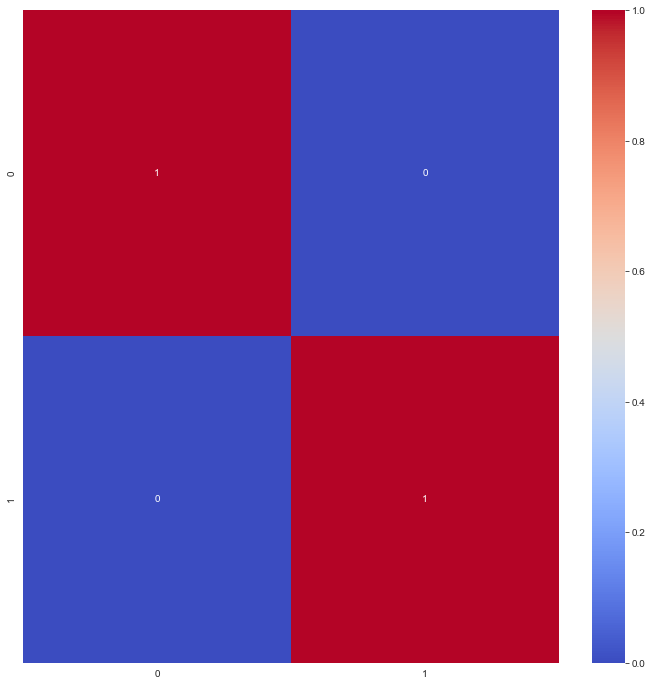

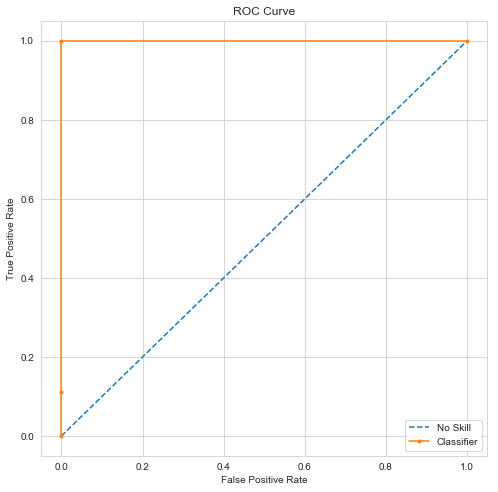

File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\eagles\eagles\Supervised\utils\data\model_eval_test.txt


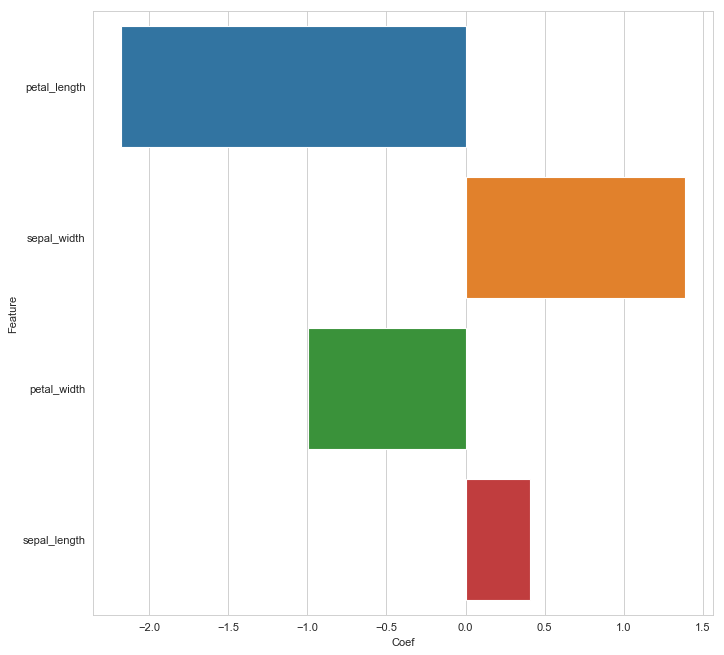

In [3]:
st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='logistic',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "roc_auc"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)


## Multi-Class Classification

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.22141575813293457
Finished cv run: 2 time: 0.14660978317260742
Finished cv run: 3 time: 0.151594877243042
Finished cv run: 4 time: 0.14561009407043457
Finished cv run: 5 time: 0.17855095863342285

CV Run Scores
f1 scores: [0.9454191  0.96705882 0.91304348 0.96705882 1.        ]
f1 mean: 0.9585160457267067
f1 standard deviation: 0.028657148706117058 

precision scores: [0.96666667 0.97435897 0.91414141 0.96296296 1.        ]
precision mean: 0.9636260036260037
precision standard deviation: 0.02791656900149566 

 

Final cv train test split
f1 score: 1.0
precision score: 1.0
 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.0

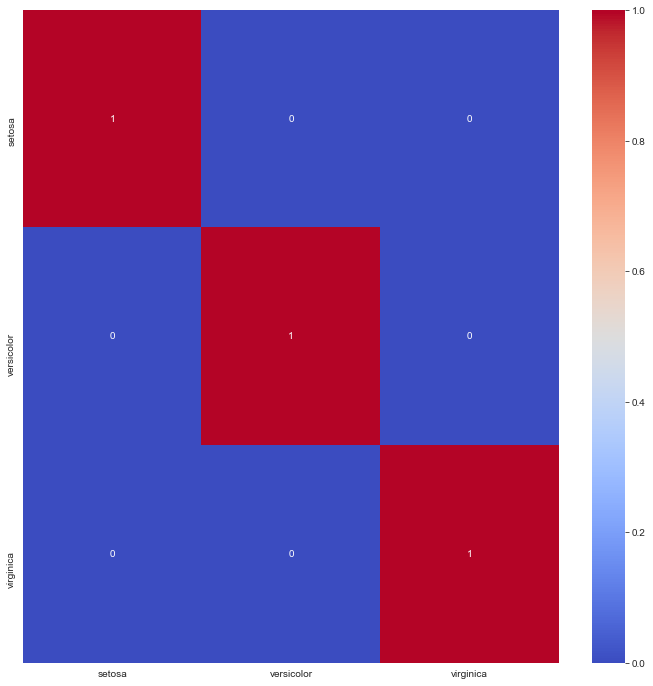

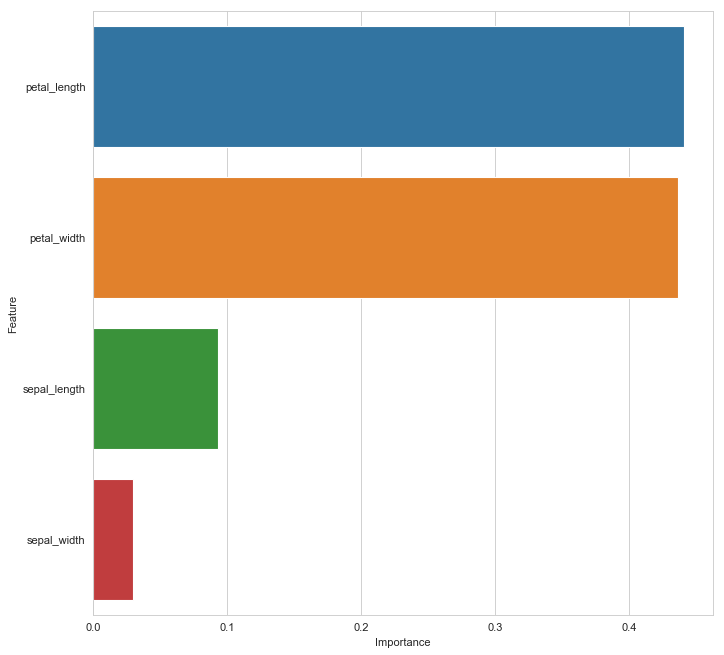

In [4]:
st.model_eval(
    X=iris[fts],
    y=iris['species'],
    model='rf_clf',
    params={'n_estimators':100, 'max_depth':10},
    metrics=["f1", "precision"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=False
)


## Classification Model Parameter Tuning using tuner utils feature selection
Note feature selection happens pre grid search and is not implemented within a pipeline

Random Seed Value: 578
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\users\jonla\eaglemldev\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    1.2s finished


Best score for grid search: 1.0
Parameters of the best model: 

C :1.0
class_weight :None
dual :False
fit_intercept :True
intercept_scaling :1
l1_ratio :None
max_iter :100
multi_class :auto
n_jobs :None
penalty :l1
random_state :None
solver :liblinear
tol :0.0001
verbose :0
warm_start :False


Performing model eval on best estimator
Random Seed Value: 578
Performing CV Runs: 5
Finished cv run: 1 time: 0.015610694885253906
Finished cv run: 2 time: 0.0
Finished cv run: 3 time: 0.0
Finished cv run: 4 time: 0.015633821487426758
Finished cv run: 5 time: 0.0

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

precision_recall_auc scores: [1. 1. 1. 1. 1.]
precision_recall_auc mean: 1.0
precision_recall_auc standard deviation: 0.0 

 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   

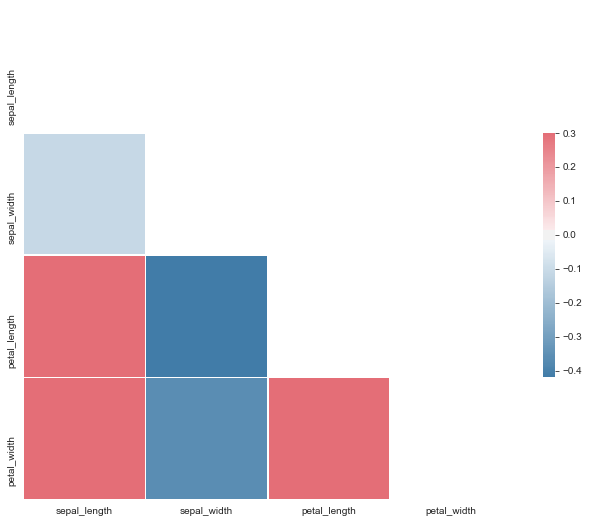

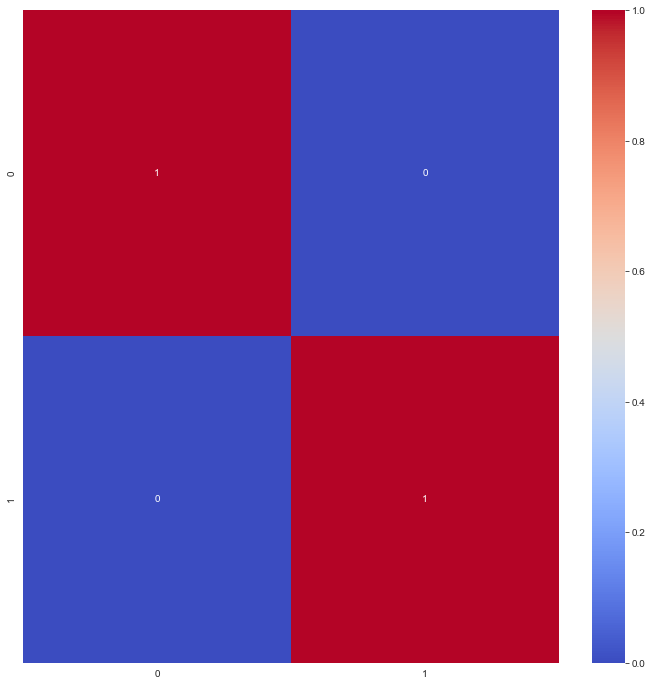

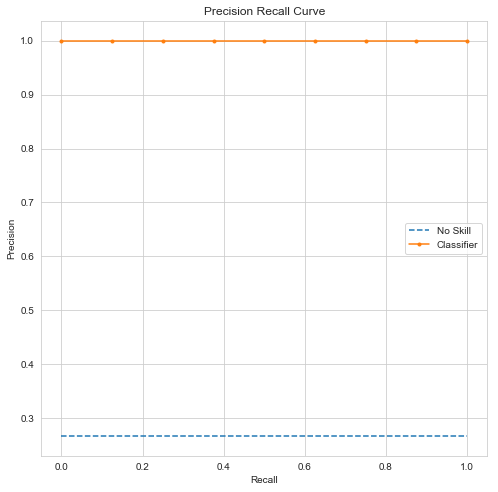

File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\eagles\eagles\Supervised\utils\data\model_tunetest_test.txt


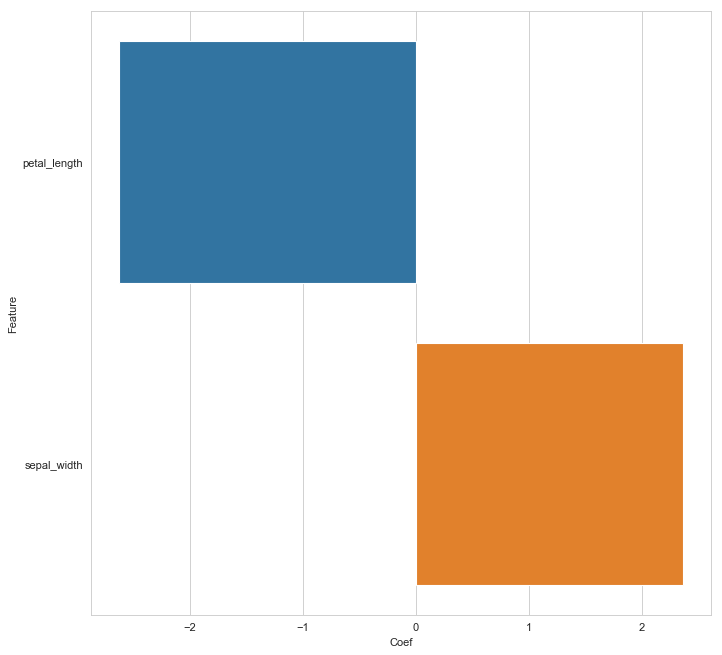

In [5]:
select_features_dict = {
    'methods':['correlation', 'regress'],
    'imp_thresh':.005,
    'corr_thresh':.9,
    'bin_fts':[],
    'dont_drop':None,
    'model_pipe':None,
    'plot_ft_importance':True,
    'plot_ft_corr':True

}

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

mod, params, features = st.tune_test_model(X=iris[fts],
                                            y=iris['dummy'],
                                            model='logistic',
                                            params=pars,
                                            tune_metric="f1",
                                            eval_metrics=["accuracy", "f1", "precision_recall_auc"],
                                            num_cv=5,
                                            pipe=None,
                                            scale=None,
                                            select_features=select_features_dict,
                                            bins=None,
                                            num_top_fts=None,
                                            tuner="grid_cv",
                                            n_iterations=15,
                                            get_ft_imp=True,
                                            n_jobs=2,
                                            random_seed=None,
                                            binary=True,
                                            log="log",
                                            log_name="model_tunetest_test.txt",
                                            log_path=None,
                                            log_note="This is a test of the tune test function"
                                        )

## Voting Classifier with embedded pipelines

Random Seed Value: 893
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\users\jonla\eaglemldev\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    9.5s finished


Best score for grid search: 1.0
Parameters of the best model: 

estimators :[('rf', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf', RandomForestClassifier(max_depth=20, random_state=4))])), ('lr', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.25, max_iter=1000, random_state=4,
                                    solver='liblinear'))]))]
flatten_transform :True
n_jobs :None
verbose :False
voting :soft
weights :[1, 1]
rf :Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf', RandomForestClassifier(max_depth=20, random_state=4))])
lr :Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.25, max_iter=1000, random_state=4,
                                    solver='liblinear'))])
rf__me

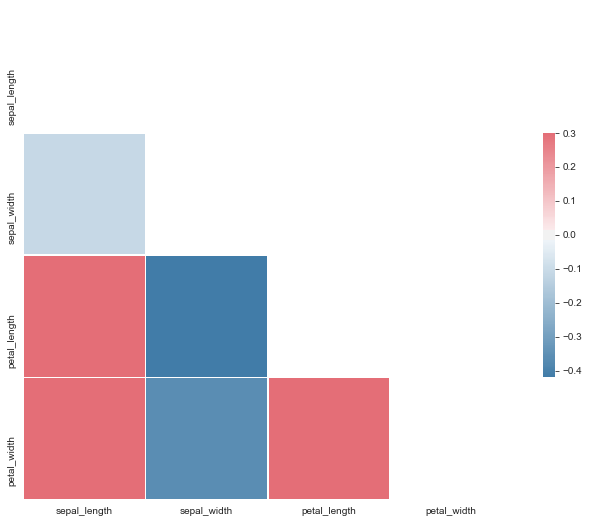

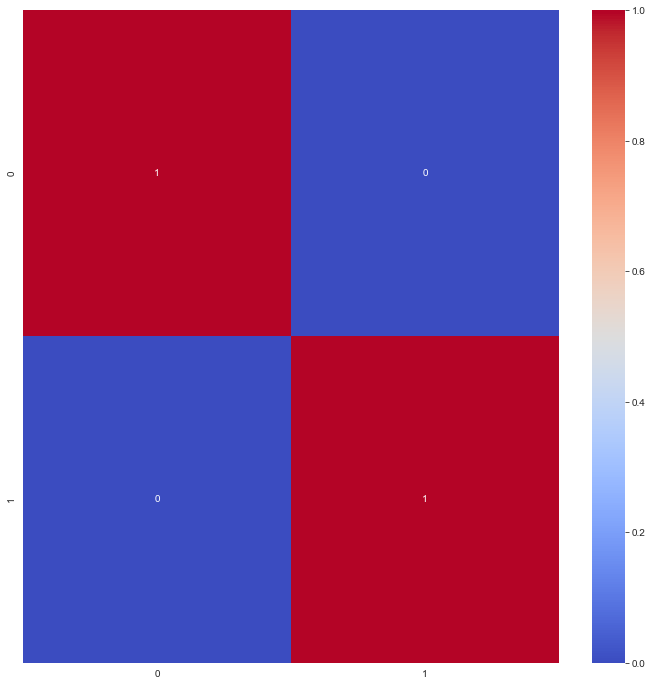

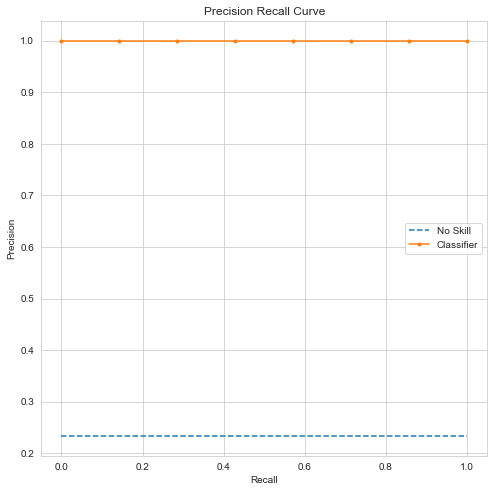

Saving out the: log
File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\eagles\eagles\Supervised\utils\data\model_tunetest_test_20200805-2134model_tunetest_test.txt
Saving out the: mod
Saving out the: data


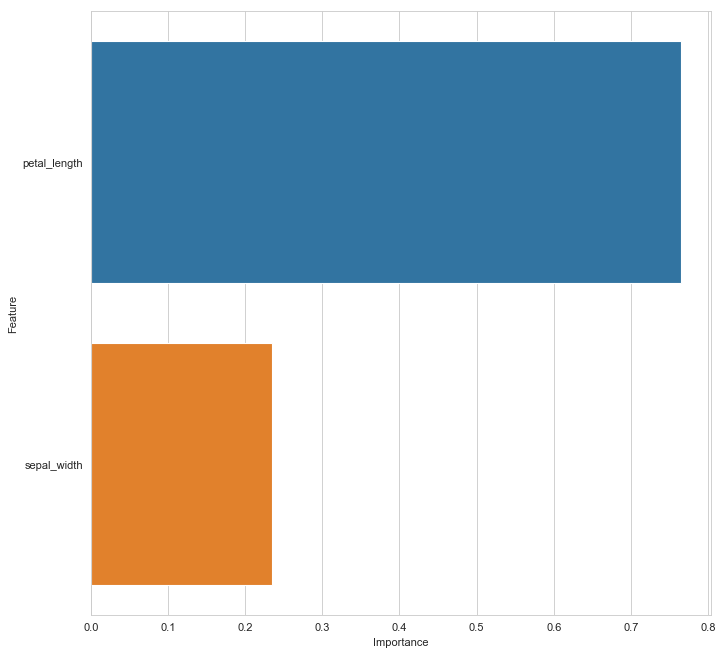

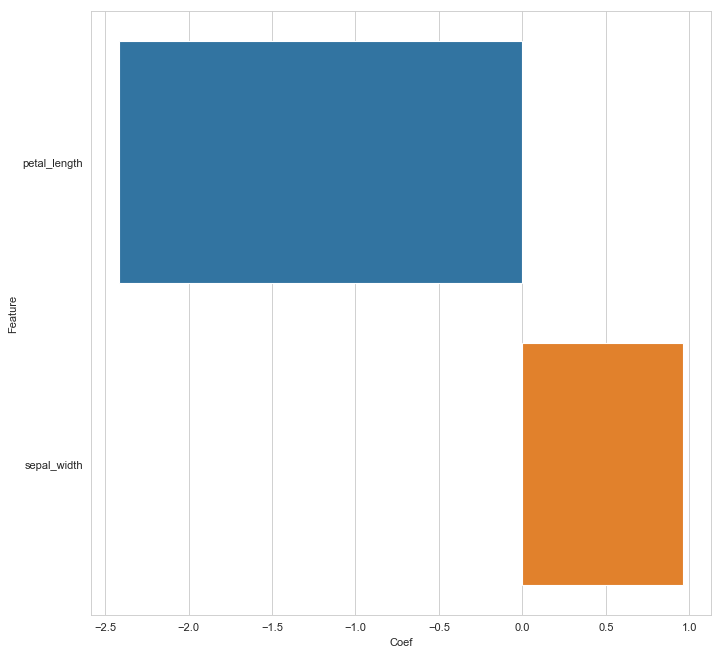

In [6]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

note = """
Voting Classifier with base lr and rf

grid search tuning for f1 for species setsoa

For missing values used median fills with imputer for others. 

Removed the prp cols, loc_pref, cl and vis ideal

regress and corr feature select
"""


# Define the initial steps of the pipeline (i.e. impute and scaling strategy)
select_ft_model_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                       ,('scale', MinMaxScaler())]
                     )

# Define the feature selection parameters
select_features_dict = {'methods':['regress', 'correlation']
                       ,'imp_thresh':.005
                       ,'corr_thresh':.9
                       ,'bin_fts':[]
                       ,'dont_drop':None
                       ,'model_pipe':select_ft_model_pipe
                       ,'plot_ft_importance':True
                       ,'plot_ft_corr':True 
                       }


# Define the models  
rf_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('clf', RandomForestClassifier())
                   ])

lr_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('scale', MinMaxScaler())
                    ,('clf', LogisticRegression())
                   ])


vc_clf = VotingClassifier(estimators=[('rf', rf_pipe)
                                      ,('lr', lr_pipe)]
                          , voting='soft')



pars = {'rf__clf__n_estimators':[x for x in range(100,300,50)]
        ,'rf__clf__max_depth':[10, 20]
        ,'rf__clf__class_weight': [None, 'balanced_subsample']
        ,'rf__clf__random_state':[4]

        ,'lr__clf__penalty': ['l2']
        ,'lr__clf__class_weight':[None, 'balanced']
        ,'lr__clf__max_iter':[1000]
        ,'lr__clf__C': [.25]
        ,'lr__clf__solver':['liblinear']
        ,'lr__clf__random_state':[4] 

        ,'weights':[[1,1],[1,2],[2,1]] 
       }


clf, params, clf_fts = st.tune_test_model(X=iris[fts]
                                            ,y=iris['dummy']
                                            ,model=vc_clf
                                            ,params=pars
                                            ,tune_metric="f1"
                                            ,eval_metrics=["accuracy", "f1", "precision", "precision_recall_auc"]
                                            ,num_cv=5
                                            ,pipe=None
                                            ,scale=None
                                            ,select_features=select_features_dict
                                            ,bins=None
                                            ,num_top_fts=None
                                            ,tuner="random_cv"
                                            ,n_iterations=15
                                            ,get_ft_imp=True
                                            ,n_jobs=2
                                            ,random_seed=None
                                            ,binary=True
                                            ,log=["log","mod","data"]
                                            ,log_name="model_tunetest_test.txt"
                                            ,log_path=None
                                            ,log_note=note)